In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import snap
import networkx

In [3]:
labels=pd.read_csv('../input/training_variants',index_col=0)['Class'].to_dict()

In [4]:
df =pd.read_csv('edges_page.txt',header=None)

In [5]:
df.columns=['rawsrc','rawdest','w']
df.shape

(266949, 3)

In [6]:
a=pd.DataFrame(np.concatenate([df[['w','rawsrc']].values,df[['w','rawdest']].values]),columns=['w','n'])
a=a[a['n'].map(lambda u: u.startswith('tr'))]

In [73]:
df.w.value_counts().shape

(17672,)

In [75]:
7/35.

0.2

In [8]:
b1=a.groupby(['w','cls']).count().reset_index()
b1.columns=['w','cls','count']
b2=a[['w','n']].groupby(['w']).count().reset_index()
b2.columns=['w','sum_count']

In [9]:
b=pd.merge(b1,b2, on='w',how='left')

In [10]:
b['p']=1.0*(b['count']+1)/(b['sum_count']+9)

In [11]:
b.head()

w  cls  count  sum_count         p
0 -2147463395    1      2          2  0.272727
1 -2147291100    3      1          1  0.200000
2 -2146651617    5      1          1  0.200000
3 -2146638850    1      1          1  0.200000
4 -2146371410    7      1          1  0.200000

In [12]:
d=b[['w','p']].groupby('w').max().sort_values('p')

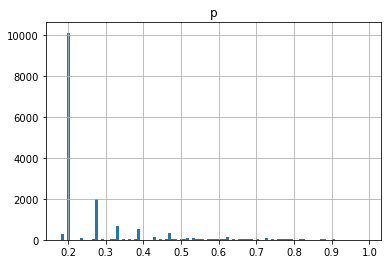

In [13]:
d.hist(bins=100);

In [15]:
d[d.p>0.8].shape

(223, 1)

In [16]:
probs={}
for w in set(b['w']):
    subdf=b[b['w']==w][['cls','count', 'sum_count']].values
    m=float(subdf[0,2])+9
    thisp={i:1/m for i in range(1,10)}
    for u,v,_ in subdf:
        thisp[u]=(v+1)/m
    probs[w]=thisp
len(probs)

15857

In [17]:
pd.DataFrame(probs).T.head()

1         2         3         4         5         6  \
-2147463395  0.272727  0.090909  0.090909  0.090909  0.090909  0.090909   
-2147291100  0.100000  0.100000  0.200000  0.100000  0.100000  0.100000   
-2146651617  0.100000  0.100000  0.100000  0.100000  0.200000  0.100000   
-2146638850  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
-2146371410  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   

                    7         8         9  
-2147463395  0.090909  0.090909  0.090909  
-2147291100  0.100000  0.100000  0.100000  
-2146651617  0.100000  0.100000  0.100000  
-2146638850  0.100000  0.100000  0.100000  
-2146371410  0.200000  0.100000  0.100000

In [18]:
import itertools
def constant_factory(value):
    return itertools.repeat(value).next

In [19]:
from collections import defaultdict
logp=defaultdict(constant_factory(np.zeros(9)))
for src,dest,w in df.values:
    if w in probs:
        thisp= np.log([probs[w][i] for i in range(1,10)])
        logp[src]=logp[src]+thisp
        logp[dest]=logp[dest]+thisp

In [20]:
nvp={}
for k,v in logp.items():
    v=v-v.max()
    v=np.exp(v)
    nvp[k]=v/np.sum(v)

In [21]:
v

array([  3.36469964e-17,   1.00000000e+00,   3.36469964e-17,
         3.36469964e-17,   3.36469964e-17,   3.36469964e-17,
         1.00000000e+00,   3.36469964e-17,   3.36469964e-17])

In [22]:
k

'te3152'

In [23]:
labels[998]

4

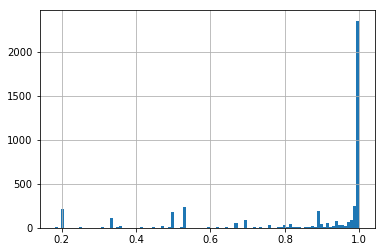

In [40]:
x=np.round(pd.DataFrame(nvp).T,6)
x['istrain']=x.index.map(lambda u: u.startswith('tr'))
x[~x.istrain].max(1).hist(bins=100)

In [41]:
np.log(x[~x.istrain].max(1)).mean()

-0.2292063171839747

In [33]:
priordf=(pd.Series(labels.values()).value_counts()/float(len(labels))).sort_index()
priordf

1    0.171033
2    0.136104
3    0.026799
4    0.206564
5    0.072870
6    0.082806
7    0.286962
8    0.005721
9    0.011141
dtype: float64

In [37]:
prior =np.round(priordf.tolist(),6)
prior

array([ 0.171033,  0.136104,  0.026799,  0.206564,  0.07287 ,  0.082806,
        0.286962,  0.005721,  0.011141])

In [76]:
submission=pd.DataFrame([prior.copy() for i in range(0,5668)],columns="class1,class2,class3,class4,class5,class6,class7,class8,class9".split(","))
submission.index.name="ID"

In [54]:
test_pred=x[~x.istrain].drop("istrain",axis=1)
test_pred.index=test_pred.index.map(lambda u: int(u[2:]))
test_pred.columns=submission.columns

In [56]:
submission.iloc[test_pred.index]=test_pred

In [62]:
np.log(submission.max(1)).mean()

-0.43653458646956944

In [64]:
submission.to_csv("../submission/sub_nb_longtxt.csv")

In [80]:
test_pred.shape,submission.shape

((4515, 9), (5668, 9))

In [81]:
4515./5668

0.7965772759350741

In [ ]:
0.2*1.74+0.8*x=7.8

In [82]:
(7.8-0.2*1.74)/0.8

9.315

In [85]:
1+9.315/np.log(1e-15)

0.73030312673808062